# Random Forest Vs. Deep Learning Model


Random forest classifiers are a type of ensemble learning model that combines multiple smaller models into a more robust and accurate model. Random forest models use a number of weak learner algorithms (decision trees) and combine their output to make a final classification (or regression) decision. Structurally speaking, random forest models are very similar to their neural network counterparts. Random forest models have been a staple in machine learning algorithms for many years due to their robustness and scalability. Both output and feature selection of random forest models are easy to interpret, and they can easily handle outliers and nonlinear data.

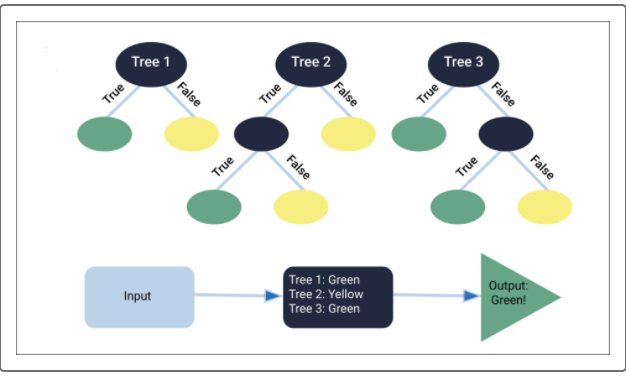

## Why would you want to replace Random Forest with a Neural Network?
The answer depends on the type and complexity of the entire dataset. First and foremost, random forest models will only handle tabular data, so data such as images or natural language data cannot be used in a random forest without heavy modifications to the data. Neural networks can handle all sorts of data types and structures in raw format or with general transformations (such as converting categorical data).

In addition, each model handles input data differently. Random forest models are dependent on each weak learner being trained on a subset of the input data. Once each weak learner is trained, the random forest model predicts the classification based on a consensus of the weak learners. In contrast, deep learning models evaluate input data within a single neuron, as well as across multiple neurons and layers.

As a result, the deep learning model might be able to identify variability in a dataset that a random forest model could miss. However, a random forest model with a sufficient number of estimators and tree depth should be able to perform at a similar capacity to most deep learning models.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


Because both Scikit-Learn's RandomForestClassifier class and TensorFlow's Sequential class require preprocessing, we can perform our preprocessing steps on all of the data—no need to keep track of separate scaled and unscaled data. For our first preprocessing workflow, let's encode our categorical variables using Scikit-Learn's OneHotEncoder class.

First, we must make sure that none of our categorical variables require bucketing. To check this, let's get the column names of categorical variables and check their number of unique values. Add and run the following code to the notebook:

In [3]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

Looking at the number of unique values in our categorical variable, the "Years_in_current_job" column does have 11 unique values. Therefore, we should check the number of data points for each unique value to find out if any categorical variables can be bucketed together. 

In [4]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

Looking at the number of data points for each unique value, all of the categorical values have a substantial number of data points. In this case, we have reason to leave the "Years_in_current_job" column alone because we don't want to bucket common values together and cause confusion in the model.

Since all of the categorical variables are ready for encoding, we can add and run the following code to the notebook:

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now that our categorical variables have been encoded, we need to merge them back into our original data frame and remove the unencoded columns. To do this, add and run the following code in the notebook:

In [6]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Next, we need to standardize our numerical variables using Scikit-Learn's StandardScaler class. Again, we must split our data into the training and testing sets prior to standardization to not incorporate the testing values into the scale. To perform the training/test split and standardize our numerical variables, add and run the following code in the notebook:

In [7]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest
After standardizing variables in both the training and testing data, our dataset is ready for both models. First, we'll train and evaluate our random forest classifier.

For our purposes, we'll use a random forest classifier with the n_estimators parameter set to 128. Typically, 128 estimators is the largest number of estimators we would want to use in a model. To create our random forest classifier model and test the performance, add and run the following code:

In [8]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


Next, we need to build, compile, and evaluate our deep learning model. Again, we'll use our typical binary classifier parameters:

Our first hidden layer will have an input_dim equal to 38, 24 neuron units, and will use the relu activation function.
Our second hidden layer will have 12 neuron unitsand also will use the relu activation function.
The loss function should be binary_crossentropy, using the adam optimizer.
Our model should provide the additional accuracy scoring metric and train over a maximum of 50 epochs.

To build and evaluate our deep learning model, we must add and run the following code to the notebook:

In [9]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 1s 538us/step - loss: 0.4924 - accuracy: 0.7824
Epoch 2/50
854/854 [==============================] - 1s 614us/step - loss: 0.3853 - accuracy: 0.8490
Epoch 3/50
854/854 [==============================] - 0s 575us/step - loss: 0.3809 - accuracy: 0.8507
Epoch 4/50
854/854 [==============================] - 1s 637us/step - loss: 0.3807 - accuracy: 0.8492
Epoch 5/50
854/854 [==============================] - 1s 608us/step - loss: 0.3824 - accuracy: 0.8474
Epoch 6/50
854/854 [==============================] - 1s 601us/step - loss: 0.3783 - accuracy: 0.8486
Epoch 7/50
854/854 [==============================] - 0s 541us/step - loss: 0.3742 - accuracy: 0.8511
Epoch 8/50
854/854 [==============================] - 0s 555us/step - loss: 0.3706 - accuracy: 0.8531
Epoch 9/50
854/854 [==============================] - 0s 557us/step - loss: 0.3781 - accuracy: 0.8475
Epoch 10/50
854/854 [==============================] - 0s 571us/step - loss: 0.375

Again, if we compare both model's predictive accuracy, their output is very similar. Both the random forest and deep learning models were able to predict correctly whether or not a loan will be repaid over 80% of the time. Although their predictive performance was comparable, their implementation and training times were not—the random forest classifier was able to train on the large dataset and predict values in seconds, while the deep learning model required a couple minutes to train on the tens of thousands of data points. In other words, the random forest model is able to achieve comparable predictive accuracy on large tabular data with less code and faster performance. The ultimate decision of whether to use a random forest versus a neural network comes down to preference. However, if your dataset is tabular, random forest is a great place to start.